<a href="https://colab.research.google.com/github/BharadwajPeringara/HR_Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading necessary libraries and Dataset

In [34]:
# Importing libraries

import joblib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
#Loading the dataset 

data = pd.read_csv('/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/hr_analytics_train.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# EDA

In [3]:
# Shape of dataset

data.shape

(54808, 14)

In [4]:
# Checking unique values in target variable 'is_promoted'

data['is_promoted'].unique()

array([0, 1])

In [5]:
# Checking the value counts in target variable 

data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

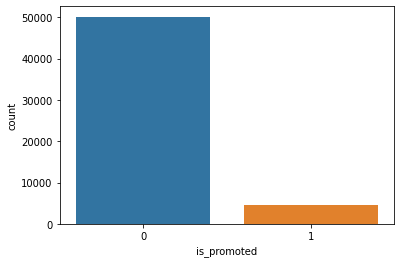

In [6]:
# Plotting the taget variable using countplot

sns.countplot(x='is_promoted', data=data)
plt.show()

In [7]:
# Information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
# Data describing

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


In [9]:
# Identifying missing values

data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

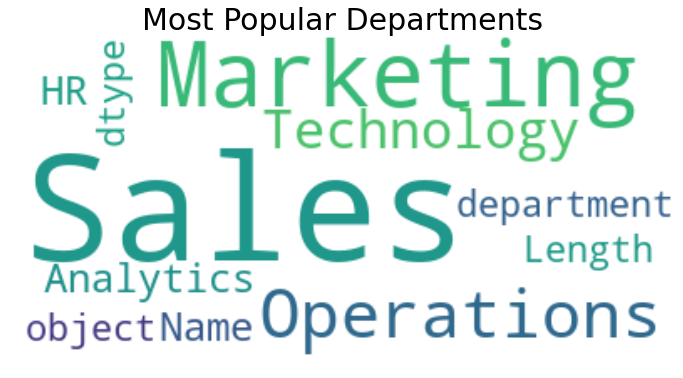

In [11]:
# looking at the most popular departments

stopword = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(data['department']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [12]:
# Removing employee_id from the dataset

data.drop(['employee_id'],axis=1,inplace=True)

# Missing value treatment

In [13]:
# Checking unique values of missing columns 'education' & 'previous_year_rating'
missingVariables = ['education', 'previous_year_rating']
for feature in missingVariables:
  print(f'The unique values of missing column {feature} are{data[feature].unique()}')

The unique values of missing column education are["Master's & above" "Bachelor's" nan 'Below Secondary']
The unique values of missing column previous_year_rating are[ 5.  3.  1.  4. nan  2.]


In [14]:
# Checking counts of each unique values in columns 'education' & 'previous_year_rating'
for feature in missingVariables:
  print(f'Total counts of each unique values in {feature} are\n{data[feature].value_counts()}')
  print(200*'-')

Total counts of each unique values in education are
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Total counts of each unique values in previous_year_rating are
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
#Filling missing values into the columns

for feature in missingVariables:
  data[feature].fillna(data[feature].mode()[0], inplace=True)

In [16]:
#Converting datatype of column 'previous_year_rating' into integer

data['previous_year_rating'] = data['previous_year_rating'].astype(int)

In [17]:
#Taking object columns from dataset

objectColumns = data.select_dtypes(include=np.object).columns
objectColumns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [18]:
# Counting total number of unique values in objectColumns

for feature in objectColumns:
    print(f'Total counts of each unique values in {feature} are\n{data[feature].nunique()}')
    print('---------------------------------------------------------------------------------------------------------------------------------------------------------')

Total counts of each unique values in department are
9
---------------------------------------------------------------------------------------------------------------------------------------------------------
Total counts of each unique values in region are
34
---------------------------------------------------------------------------------------------------------------------------------------------------------
Total counts of each unique values in education are
3
---------------------------------------------------------------------------------------------------------------------------------------------------------
Total counts of each unique values in gender are
2
---------------------------------------------------------------------------------------------------------------------------------------------------------
Total counts of each unique values in recruitment_channel are
3
------------------------------------------------------------------------------------------------------------

In [19]:
# Keeping objectColumns into a variable

dataObjectDF = data[objectColumns]

In [20]:
# Converting objects into integers using LabelEncoder and pickle filing the encoder

defaultEncoder= defaultdict(LabelEncoder)

# variable enconding
fittrainObjectDF= dataObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))
joblib.dump(defaultEncoder,'/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/encoded.pkl')

['/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/encoded.pkl']

In [21]:
# Dropping the objectColumns and concatinating encoded variable to the dataset

data.drop(objectColumns, axis=1, inplace=True)
data = pd.concat([data, fittrainObjectDF], axis=1)


# Correlation and Graphs of dataset

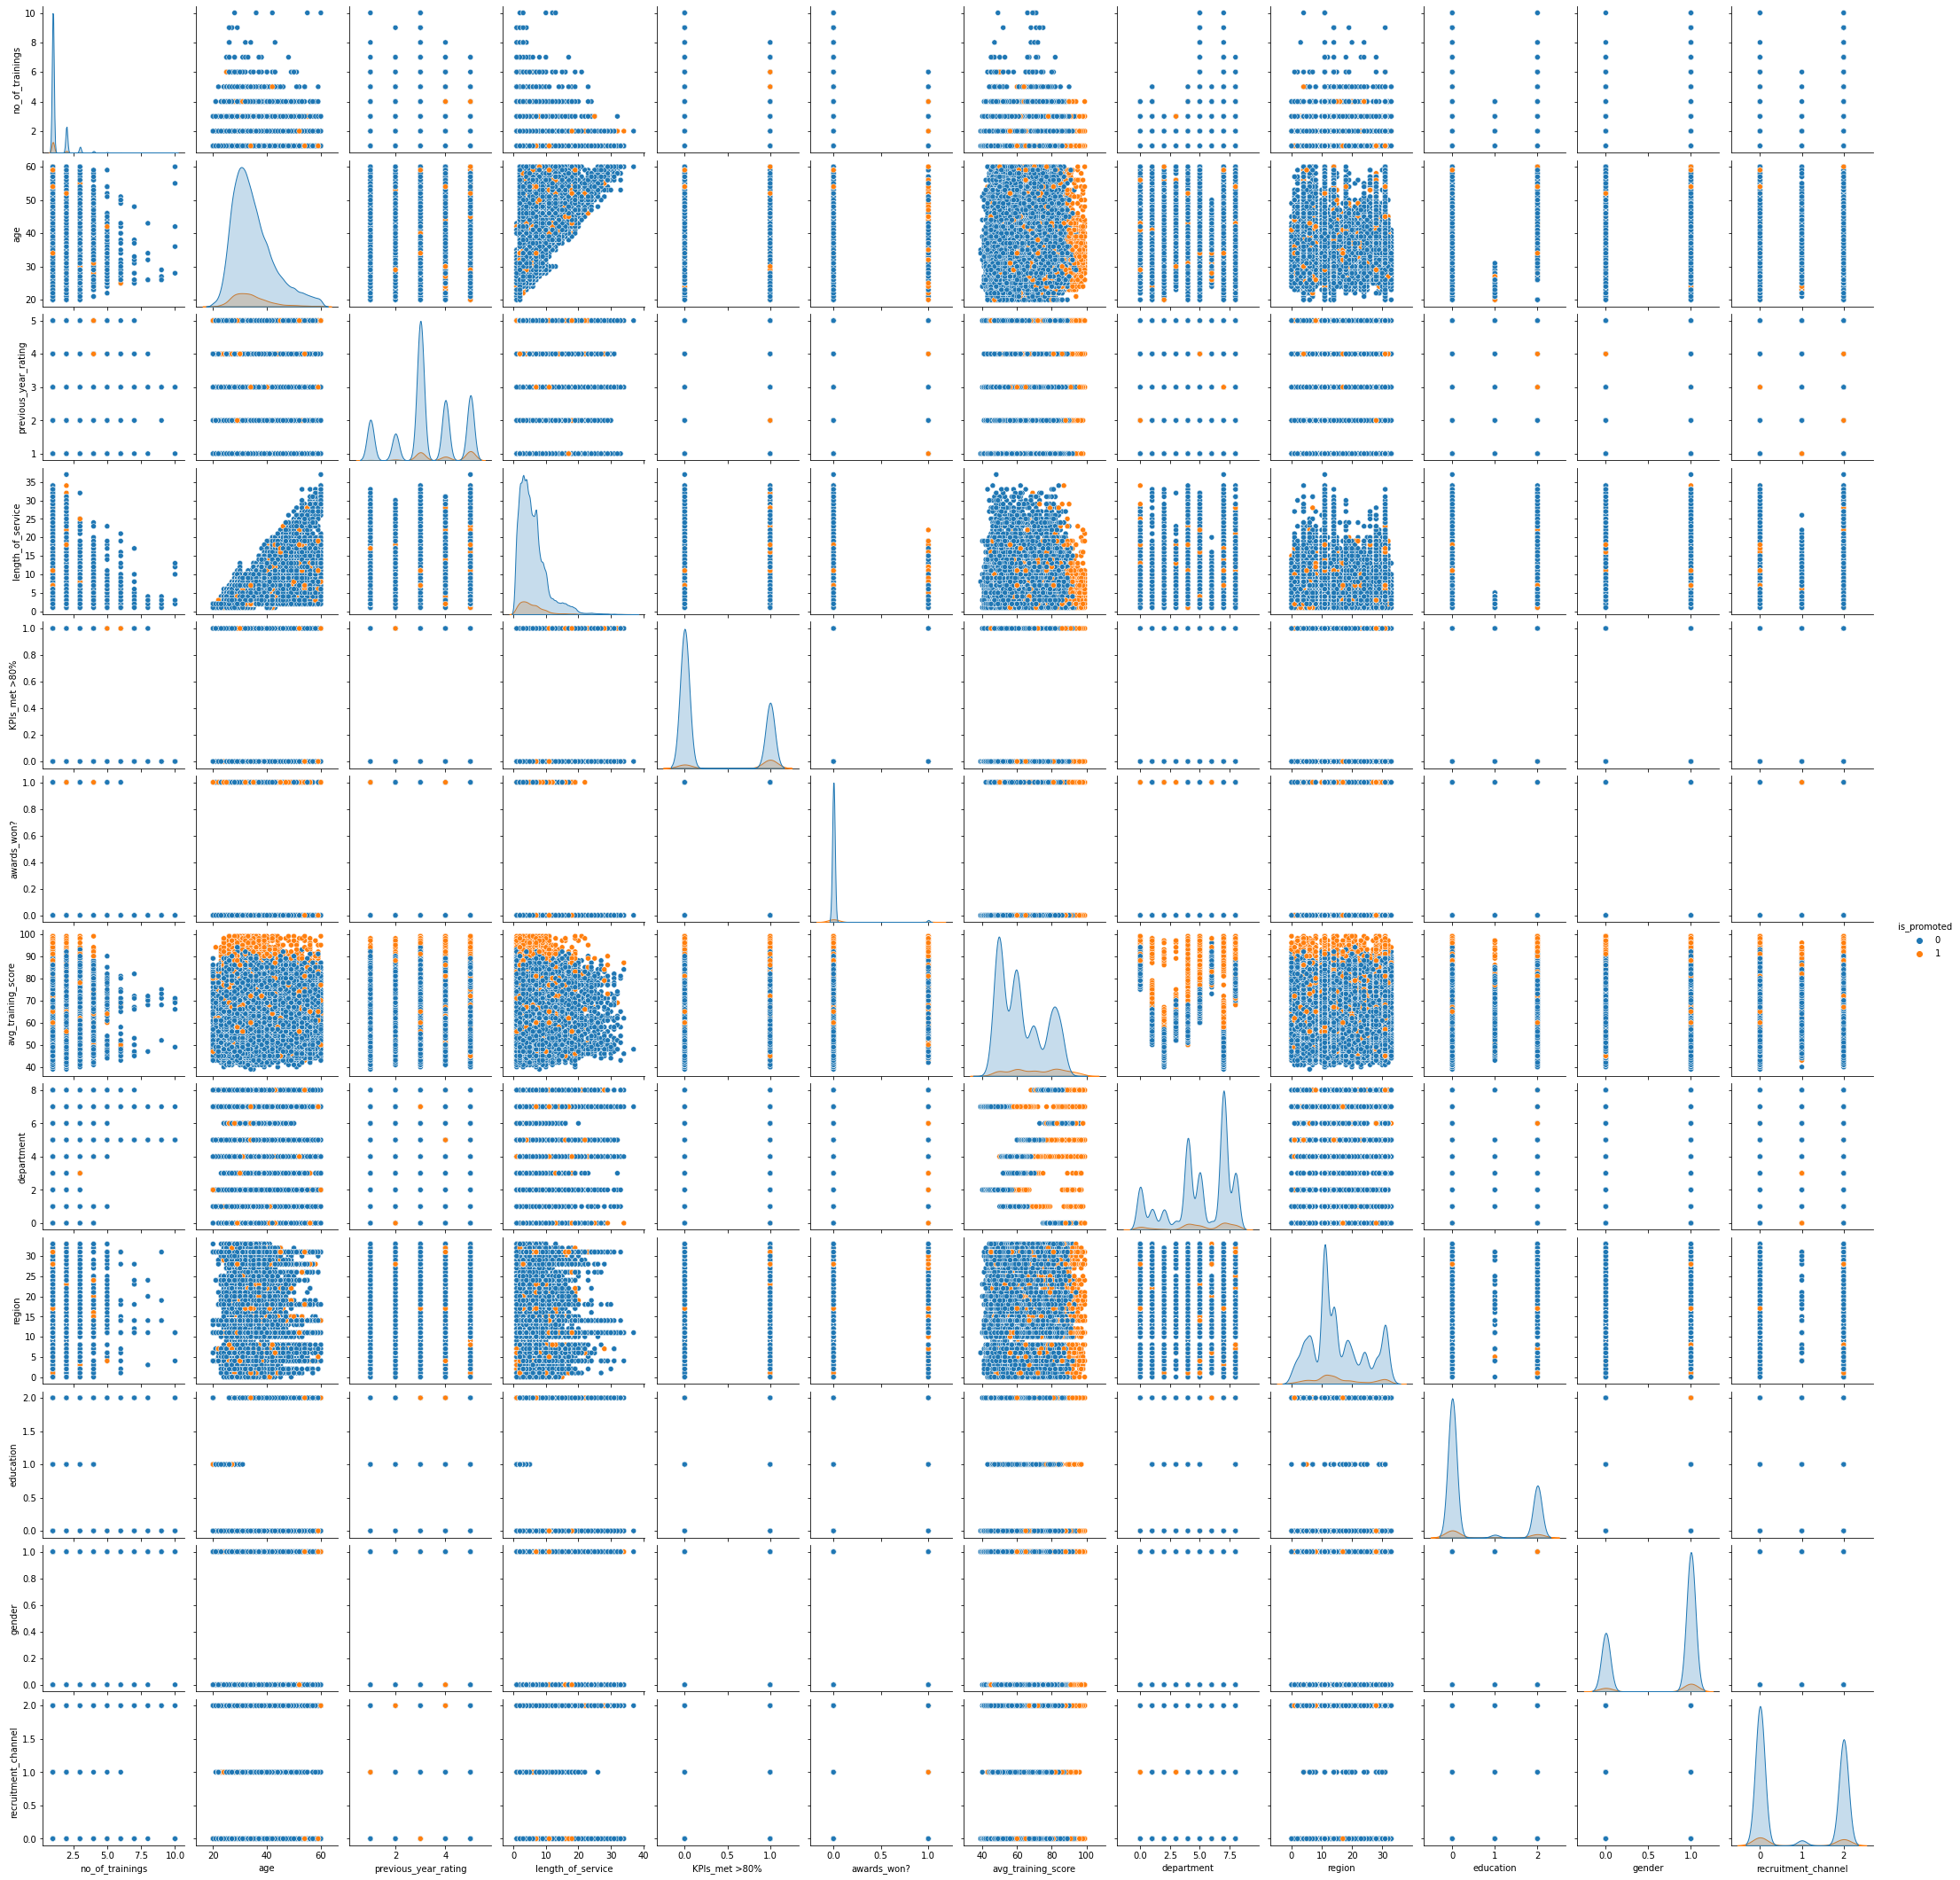

In [ ]:
# Pairplot on basis of target variable

sns.pairplot(data, hue='is_promoted')
plt.show()

In [22]:
# Data correlation on the basis of target variable 

data.corr()['is_promoted']

no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153230
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
department              0.000130
region                  0.008841
education               0.029257
gender                 -0.011109
recruitment_channel     0.002229
Name: is_promoted, dtype: float64

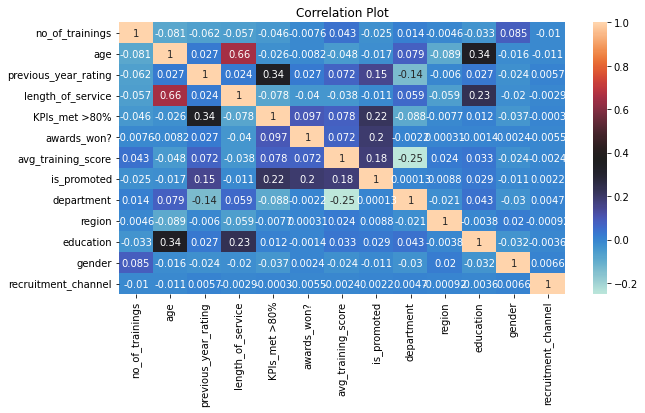

In [23]:
# Correlation using Heatmap 

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, cmap='icefire')
plt.title('Correlation Plot')
plt.show()

# Handling Outliers

In [24]:
#Taking numericals columns from dataset

numericalColumns = data.select_dtypes(include=np.number).columns
numericalColumns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department', 'region', 'education', 'gender', 'recruitment_channel'],
      dtype='object')

In [25]:
#Seperating descriate columns and continuous columns from dataset

descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if data[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [26]:
#List of continuous columns

continuesCols

['age', 'length_of_service', 'avg_training_score', 'region']

In [27]:
#List of descriate columns

descriateCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted',
 'department',
 'education',
 'gender',
 'recruitment_channel']

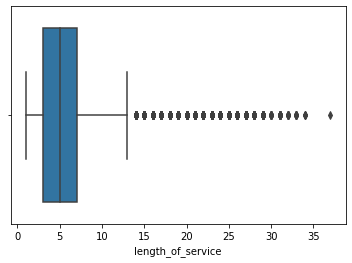

In [28]:
#Checking Outliers using boxplot

sns.boxplot(data['length_of_service'])

In [29]:
# Outlier handling in continuous columns with standard deviation of '3'

for column in continuesCols:
    upper_lim=data[column].mean()+data[column].std() *3
    lower_lim=data[column].mean()-data[column].std() *3

    data.loc[(data[column] > upper_lim),column] = upper_lim
    data.loc[(data[column] < lower_lim),column] = lower_lim

# Train Test Splitting

In [30]:
#Generating the Model on Selected Features

X = data.drop(['is_promoted'], axis=1)
y = data['is_promoted']

In [31]:
#Splitting dataset into training set and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Scaling Down 

In [32]:
# Scaling downing using Standard scales

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

joblib.dump(scale,'/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/scale.pkl')

['/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/scale.pkl']

#Applying Various Algorithms

In [ ]:
#Applying different algorithms and finding suitable one from them using votingClassifier

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adb_clf = AdaBoostClassifier()
gd_clf = GradientBoostingClassifier()
svc_clf = SVC()
xgb_clf = XGBClassifier()

vote = VotingClassifier(estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier',dt_clf),('Random_Forest_Classifier',rf_clf),
                             ('Adaboost_Classifier',adb_clf),('Gradient_Boosting_Classifier',adb_clf),('SVC',svc_clf),('XGB_Classifier',xgb_clf)],voting = 'hard')
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('Adaboost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              AdaBoostClassifier()),
                             ('SVC', SVC()),
                             ('XGB_Classifier', XGBClassifier())])

In [ ]:
#Checking score and accuracy score of applied algorithms

algos = [lr_clf,dt_clf,rf_clf,adb_clf,gd_clf,svc_clf,xgb_clf]
for clf in algos:
  clf.fit(X_train_scale,y_train)
  y_pred = clf.predict(X_test_scale)
  print(f'The score of {clf.__class__.__name__} is {clf.score(X_train_scale,y_train)}')
  print(f'The Accuracy score of {clf.__class__.__name__} is {accuracy_score(y_test,y_pred)}')
  print(200*'-')

The score of LogisticRegression is 0.9171380164212173
The Accuracy score of LogisticRegression is 0.9170467676214803
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The score of DecisionTreeClassifier is 0.9997914766062818
The Accuracy score of DecisionTreeClassifier is 0.895517849540838
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The score of RandomForestClassifier is 0.999765411182067
The Accuracy score of RandomForestClassifier is 0.9335279450221979
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The score of AdaBoostClassifier 

# Hyperparameter Tuning

In [ ]:
# Applying hyperparameter tuning to the algorithms

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adb_clf = AdaBoostClassifier()
gd_clf = GradientBoostingClassifier()
svc_clf = SVC()
xgb_clf = XGBClassifier()

clf_list = [lr_clf, dt_clf, rf_clf, adb_clf, gd_clf, svc_clf, xgb_clf]
clf_params = [[{'penalty' : ['l1', 'l2'], 'solver' : ['saga']}],
              [{'criterion' : ['gini','entropy'], 'max_depth' : [3,4,5], 'splitter' : ['best','random'], 'min_samples_split' : [2,3,4], 'max_features' : ['auto','log2','sqrt']}],
              [{'n_estimators' : [5,10,20], 'criterion' : ['gini','entropy'],'max_depth' : [3,2,5,10],'max_features' : ['auto','log2','sqrt']}],
              [{'n_estimators' : [10,20,50,200], 'random_state' : [10], 'learning_rate' : [0.1,0.01]}],
              [{'n_estimators' : [5,10,50], 'criterion' : ['mse','friedman_mse'], 'learning_rate' : [1,7,9], 'loss' : ['log_loss','deviance','exponential']}],
              [{'kernel' : ['linear','poly','rbf'], 'degree' : [3,5,4], 'C' : [0.1]}],
              [{'nthread' : [10,15,25],'booster' : ['dart', 'glinear']}]]

In [ ]:
#Hyperparameter result of algorithms

for clf, clf_param in zip(clf_list, clf_params):
  print( f'The Classifier is {clf} and  hyper parameter is {clf_param}')

  grid_clf = GridSearchCV(estimator= clf, param_grid=clf_param, scoring='accuracy', cv=10)
  grid_clf.fit(X_train_scale, y_train)
  print( f'The Train accuracy for {clf} is { grid_clf.score(X_train_scale,y_train)}')
  print( f'The Test accuracy for {clf} is {grid_clf.score(X_test_scale,y_test)}')
  print(f'The Best param for the {clf} is {grid_clf.best_params_}')
  print(200*'-')

The Classifier is LogisticRegression() and  hyper parameter is [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for LogisticRegression() is 0.9171380164212173
The Test accuracy for LogisticRegression() is 0.9170467676214803
The Best param for the LogisticRegression() is {'penalty': 'l2', 'solver': 'saga'}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The Classifier is DecisionTreeClassifier() and  hyper parameter is [{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'log2', 'sqrt']}]
The Train accuracy for DecisionTreeClassifier() is 0.9249315782614362
The Test accuracy for DecisionTreeClassifier() is 0.9234932798151189
The Best param for the DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 5, 'max_feature

In [33]:
# Making the best model - XGBoost Classifier

xgboost_clf = XGBClassifier(booster = 'dart', nthread = 10)
xgboost_clf.fit(X_train_scale, y_train)

XGBClassifier(booster='dart', nthread=10)

In [36]:
pickle.dump(xgboost_clf, open("/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/pima_pickle.dat", "wb"))


In [ ]:
#Saving file of the best fit model

xgboost_clf.save_model('/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/model.json')

In [ ]:
# Pickle filing using joblib

# joblib.dump(xgboost_clf,'/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/model.pkl')

['/content/drive/MyDrive/Luminar Projects/Project2-HRAnalytics/model.pkl']